Klasifikasi Citra Buah-Buahan Menggunakan Convolutional Neural Network (CNN) untuk Edukasi Visual

Nama : Muhammad Hallaj Nashrulloh

NIM : 2206031

Kelas : Informatika-A

Link Dataset : https://www.kaggle.com/datasets/trido276/8fruits

kategori bidang pendidikan pengenalan jenis buah apel, pisang, kiwi, lemon, buah markisa, persik, nanas, dan rasberry

---


Import Library

In [22]:
# Import library yang dibutuhkan
import numpy as np #untuk operasi numerik
import matplotlib.pyplot as plt #untuk membuat grafik
import tensorflow as tf #framework utama membuat dan melatih model deep learning
from tensorflow.keras.models import Sequential #untuk membuat model neural network
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout #mengimport berbagai layer CNN
from tensorflow.keras.preprocessing.image import ImageDataGenerator #untuk augmentasi gambar
from sklearn.metrics import classification_report, roc_auc_score #untuk menghitung dan menampilkan hasil evaluasi
import os #untuk membaca folder gambar/path

Atur random seed agar hasil stabil

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

Upload dataset (disini menggunakan dataset yang sudah disimpan di google drive)

In [3]:
base_dir = '/content/drive/MyDrive/Muhammad Hallaj Nashrulloh_Machine Learning /UTS/8fruit_dataset'

Augmentasi

In [4]:
# Membuat ImageDataGenerator untuk training dan validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2, # 20% data untuk validasi
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

Data Training

In [5]:
# Generator untuk data training
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 1628 images belonging to 8 classes.


Data Validasi

In [6]:
# Generator untuk data validation
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 404 images belonging to 8 classes.


Cek Distribusi Dataset

In [9]:
import pandas as pd
from collections import Counter

label_map = train_generator.class_indices
print("Label dan Indeks Kelas:", label_map)

count_train = dict(Counter(train_generator.classes))
df_counts = pd.DataFrame(list(count_train.items()), columns=["Kelas", "Jumlah Gambar"])
df_counts["Nama Kelas"] = df_counts["Kelas"].apply(lambda x: list(label_map.keys())[list(label_map.values()).index(x)])
print(df_counts[["Nama Kelas", "Jumlah Gambar"]])


Label dan Indeks Kelas: {'Apple_Red': 0, 'Banana': 1, 'Kiwi': 2, 'Lemon': 3, 'Passion_Fruit': 4, 'Peach': 5, 'Pineapple': 6, 'Raspberry': 7}
      Nama Kelas  Jumlah Gambar
0      Apple_Red            509
1         Banana            133
2           Kiwi            125
3          Lemon            199
4  Passion_Fruit            133
5          Peach            263
6      Pineapple            133
7      Raspberry            133


Membangun Model CNN

In [10]:
# Arsitektur Model Sequential CNN
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax') # Jumlah neuron = jumlah kelas
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile dan Train Model

In [11]:
# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [12]:
# Menampilkan ringkasan model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,372,360 (12.86 MB)

 Trainable params: 3,372,360 (12.86 MB)

 Non-trainable params: 0 (0.00 B)

Melatih Model

In [15]:
import time
# Catat waktu pelatihan
start_time = time.time()

# Melatih model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

end_time = time.time()
print(f"🕒 Durasi pelatihan model: {end_time - start_time:.2f} detik")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 259s 5s/step - accuracy: 0.3548 - loss: 1.7260 - val_accuracy: 0.8020 - val_loss: 0.6882
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 41s 800ms/step - accuracy: 0.7664 - loss: 0.6417 - val_accuracy: 0.8490 - val_loss: 0.3788
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 86s 891ms/step - accuracy: 0.8873 - loss: 0.3090 - val_accuracy: 0.9084 - val_loss: 0.3275
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 41s 799ms/step - accuracy: 0.8878 - loss: 0.2909 - val_accuracy: 0.9035 - val_loss: 0.4086
Epoch 5/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 46s 904ms/step - accuracy: 0.9119 - loss: 0.2214 - val_accuracy: 0.8787 - val_loss: 0.4178
Epoch 6/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 44s 857ms/step - accuracy: 0.9404 - loss: 0.2041 - val_accuracy: 0.9059 - val_loss: 0.2378
Epoch 7/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 41s 795ms/step - accuracy: 0.9494 - loss: 0.1595 - val_accuracy: 0.9356 - val_loss: 0.1957
Epoch 8/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 39s 766ms/step - accuracy: 0.9652 - loss: 0.0857 - val_accura

Visualisasi Akurasi & Loss

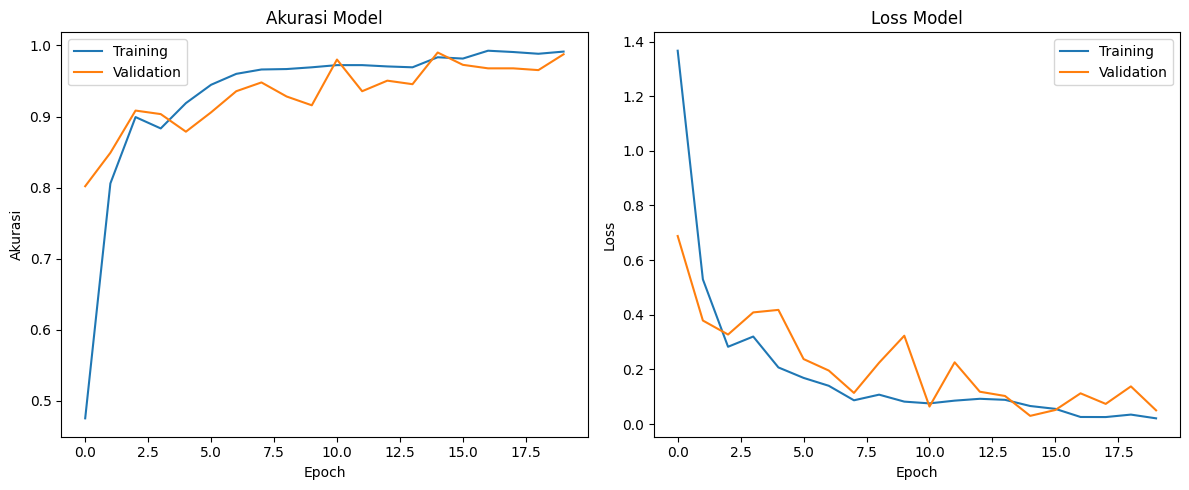

In [16]:
plt.figure(figsize=(12, 5))

# Grafik Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Akurasi Model')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

# Grafik Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Evaluasi Model

In [17]:
# Evaluasi Akurasi
loss, acc = model.evaluate(validation_generator)
print(f"\n✅ Akurasi Validasi: {acc * 100:.2f}%")
if acc >= 0.85:
    print("✅ Model memenuhi syarat akurasi minimal 85%")
else:
    print("❌ Model belum memenuhi syarat akurasi minimal 85%")

# Prediksi
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Laporan klasifikasi
print(classification_report(validation_generator.classes, y_pred))

# ROC AUC Score
print("ROC AUC Score:", roc_auc_score(validation_generator.classes, Y_pred, multi_class='ovr'))


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 270ms/step - accuracy: 0.9707 - loss: 0.0445

✅ Akurasi Validasi: 98.51%
✅ Model memenuhi syarat akurasi minimal 85%
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 286ms/step
              precision    recall  f1-score   support

           0       0.32      0.33      0.32       127
           1       0.06      0.06      0.06        33
           2       0.19      0.19      0.19        31
           3       0.18      0.18      0.18        49
           4       0.15      0.15      0.15        33
           5       0.20      0.18      0.19        65
           6       0.09      0.09      0.09        33
           7       0.06      0.06      0.06        33

    accuracy                           0.20       404
   macro avg       0.16      0.16      0.16       404
weighted avg       0.20      0.20      0.20       404

ROC AUC Score: 0.5133897555871356


Confusion Matrix

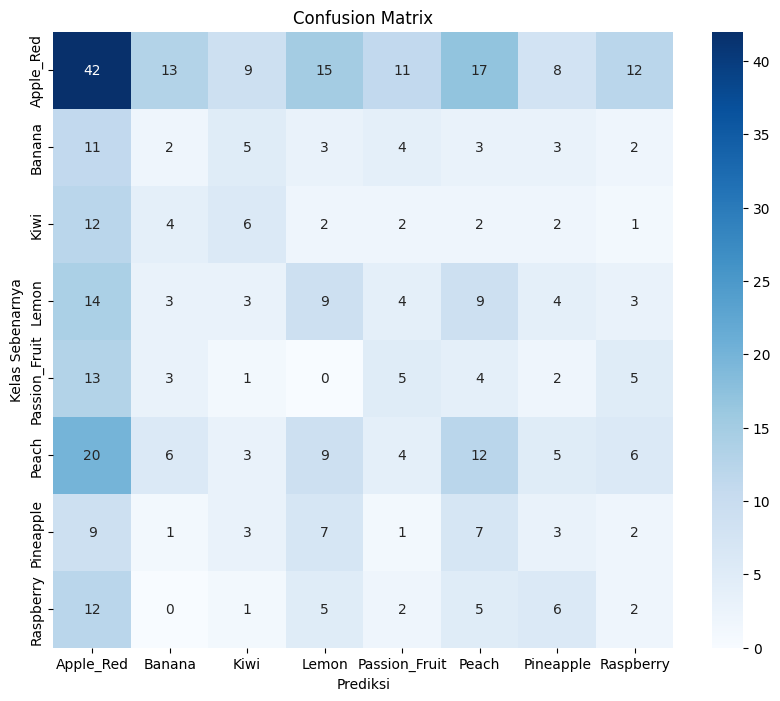

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
cm = confusion_matrix(validation_generator.classes, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=label_map.keys(),
            yticklabels=label_map.keys(),
            cmap='Blues')
plt.xlabel('Prediksi')
plt.ylabel('Kelas Sebenarnya')
plt.title('Confusion Matrix')
plt.show()


Prediksi Gambar Baru

Saving lp.jpg to lp.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


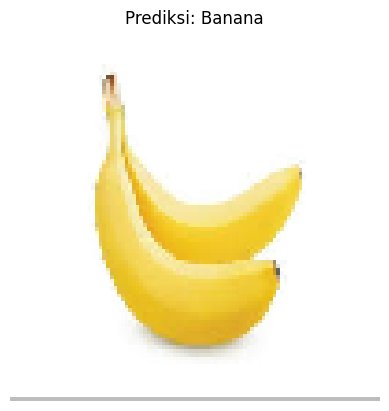

In [20]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# Upload file dari komputer pengguna
uploaded = files.upload()

# Ambil nama file yang diupload
for file_name in uploaded.keys():
    img = image.load_img(file_name, target_size=(100, 100))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.

    # Prediksi
    pred = model.predict(img_tensor)
    predicted_class = np.argmax(pred)
    class_name = list(label_map.keys())[list(label_map.values()).index(predicted_class)]

    # Tampilkan hasil prediksi
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediksi: {class_name}")
    plt.show()


Simpan Model

In [21]:
model.save("model_klasifikasi_buah.h5")
print("Model telah disimpan sebagai model_klasifikasi_buah.h5")

Model telah disimpan sebagai model_klasifikasi_buah.h5
